In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = []
date_range = pd.date_range("01/07/2020", "01/13/2020")

for i in range(len(date_range)):
    
    sales_cash = random.randint(1, 10)
    sales_card = random.randint(1, 10)

    day_type = "Weekday"

    if date_range[i].weekday()>4:
        day_type = "Weekend"
    
    data.append([str(date_range[i].date()), day_type, "Cash", sales_cash])
    data.append([str(date_range[i].date()), day_type, "Card", sales_card])
    
data = pd.DataFrame(data, columns=["Date", "Day_Type", "Payment_type", "Sales"])

In [3]:
data_orig = data.copy()

In [4]:
type(data.rolling(window = 4))

pandas.core.window.rolling.Rolling

In [8]:
data.head()

,Date,Day_Type,Payment_type,Sales,rolling_sum_2
0,2020-01-07,Weekday,Cash,4,4.0
1,2020-01-07,Weekday,Card,6,10.0
2,2020-01-08,Weekday,Cash,5,11.0
3,2020-01-08,Weekday,Card,4,9.0
4,2020-01-09,Weekday,Cash,8,12.0


In [6]:
data["rolling_sum_2"] = data.rolling(window = 2).Sales.sum()

In [7]:
data["rolling_sum_2"] = data.rolling(window = 2, min_periods=1).Sales.sum()

In [9]:
data = data_orig.copy()

In [10]:
data["Date"] = pd.to_datetime(data["Date"])
data["rolling_sum_2days"] = data.rolling(window = '2d', on = "Date").Sales.sum()

In [11]:
data.groupby("Date").last()

,Day_Type,Payment_type,Sales,rolling_sum_2days
Date,,,,
2020-01-07,Weekday,Card,6,10.0
2020-01-08,Weekday,Card,4,19.0
2020-01-09,Weekday,Card,6,23.0
2020-01-10,Weekday,Card,6,28.0
2020-01-11,Weekend,Card,2,19.0
2020-01-12,Weekend,Card,4,12.0
2020-01-13,Weekday,Card,7,17.0


In [12]:
data["rolling_sum_grouped"] = data.groupby("Payment_type").rolling(window = 2).\
                              Sales.sum().reset_index().set_index("level_1").\
                              sort_index()["Sales"]

In [13]:
data = []
date_range = pd.date_range("01/07/2020", "03/31/2020")

for i in range(len(date_range)):
    
    sales_cash = random.randint(1, 10)
    sales_card = random.randint(1, 10)

    day_type = "Weekday"

    if date_range[i].weekday()>4:
        day_type = "Weekend"
    
    data.append([str(date_range[i].date()), day_type, "Cash", sales_cash])
    data.append([str(date_range[i].date()), day_type, "Card", sales_card])
    
data = pd.DataFrame(data, columns=["Date", "Day_Type", "Payment_type", "Sales"])

In [14]:
data["Date"] = pd.to_datetime(data["Date"])
data["rolling_avg_3days"] = data.rolling(window = 6, min_periods=1).Sales.mean()

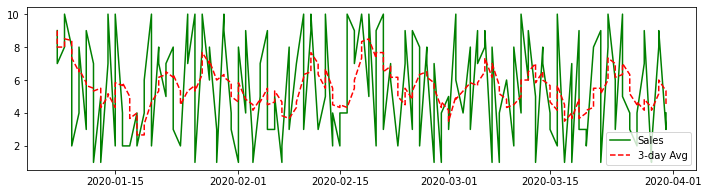

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
plt.plot(data["Date"], data["Sales"], label = "Sales", color = "green")
plt.plot(data["Date"], data["rolling_avg_3days"], 
         color = "red", label = "3-day Avg", linestyle="--")

plt.legend()
plt.show()